<a href="https://colab.research.google.com/github/bellatchen/food_sales_predictions/blob/main/Project1_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
filename = "/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions.csv"
df_sales_predictions = pd.read_csv(filename)
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052






6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [5]:
#1) How many rows and columns? 
#2) What are the datatypes of each variable?
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df_sales_predictions.duplicated().sum()

0

In [7]:
#4) Identify missing values.
df_sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
#6) Confirm that there are no missing values after addressing them.
df_sales_predictions.drop(columns = ["Item_Weight", "Outlet_Size"], inplace = True)
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

I chose to drop the Outlet Size column due to an inability to determine from the given data whether or not a store/outlet is considered a Low/Medium/High size. The Item Weight column also got dropped due to an inability to come up with reliable data on the weight of the item. As none of rows were missing both Outlet Size and Item Weight, removing these two columns would allow us to keep more reliable data without running the risk of introducing inaccurate/bad data.


In [9]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
#Item Fat Content - reg/Regular
df_sales_predictions["Item_Fat_Content"] = df_sales_predictions["Item_Fat_Content"].replace(["LF", "low fat"], "Low Fat")

In [10]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
#Item Fat Content -  reg/Regular
df_sales_predictions["Item_Fat_Content"] = df_sales_predictions["Item_Fat_Content"].replace("reg", "Regular")

In [11]:
df_sales_predictions["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df_sales_predictions.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Pt 3
Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

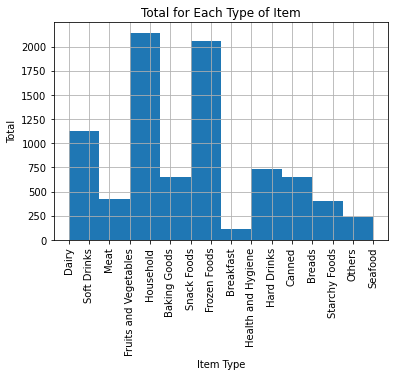

In [20]:
#Histogram for Item Outlet Sales
df_sales_predictions["Item_Type"].hist()
plt.title("Total for Each Type of Item")
plt.xlabel("Item Type")
plt.ylabel("Total")
plt.xticks(rotation = 90)

In [ ]:
#boxplot for 


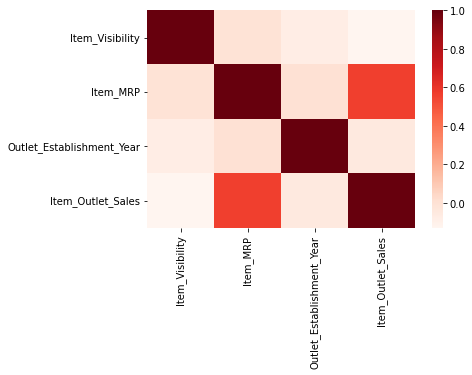

In [23]:
#heatmap for Correlation
corr = df_sales_predictions.corr()
sns.heatmap(corr, cmap = 'Reds')